In [2]:
from csv import reader
import pandas as pd
import numpy as np
import os, glob, cv2

folder_pwd = os.getcwd()
os.chdir('..')
os.chdir('../resources/Data - BabyWatcher/1000')
path = os.getcwd()

# Get all csv files
csv_file = path+'/pre-processed.csv'

os.chdir(folder_pwd)

In [8]:
df = pd.read_csv(csv_file)
df[['type', 'size']].groupby('type').aggregate(['mean', 'max', 'min'])

size         
             mean  max min
type                      
arm     97.224138  202  55
foot    56.750000   84  32
hand    66.101695  160  32
head   150.247770  321  69
leg    106.846154  165  47
none   132.718524  224  50
spine  144.709770  345  55

In [3]:
imgs = dict()
for im in df['img'].unique():
    imgs[im] = cv2.imread(path+'/Images/'+im, 0)
def extract_subsection(row):
    img = imgs[row['img']]
    subsect = img[row['y']:row['y']+row['size'], row['x']:row['x']+row['size']]
    # In case the crop was near an edge, creating the square could make it go outside image
    if subsect.shape[0] != subsect.shape[1]:
        diff = subsect.shape[0] - subsect.shape[1]
        if diff<0:
            subsect = np.pad(subsect, ((0, abs(diff)),(0,0)),constant_values=0)
        else:
            subsect = np.pad(subsect, ((0, 0),(0, abs(diff))),constant_values=0)
    if subsect.shape[0]!=subsect.shape[1]:
        print('WEEEEWOOO')
    row['subsection'] = subsect
    return row

df = df.apply(extract_subsection, axis=1)
df = df.dropna()
df

,type,x,y,img,from_file,size,subsection
0,head,366,139,19150_2021-01-25_21.00_20523817.png,Batch1.csv,124,"[[40, 48, 58, 58, 58, 55, 53, 61, 75, 86, 90, ..."
1,arm,264,147,19150_2021-01-25_21.00_20523817.png,Batch1.csv,99,"[[48, 36, 28, 25, 18, 12, 12, 15, 15, 15, 14, ..."
2,head,352,134,19158_2021-01-10_19.16_191051467.png,Batch1.csv,151,"[[155, 146, 141, 148, 154, 154, 152, 147, 144,..."
3,spine,294,226,19158_2021-01-10_19.16_191051467.png,Batch1.csv,90,"[[53, 51, 47, 51, 55, 60, 66, 72, 73, 71, 74, ..."
4,head,397,126,19162_2021-01-08_13.46_134330502.png,Batch1.csv,123,"[[115, 119, 123, 132, 131, 136, 141, 141, 137,..."
...,...,...,...,...,...,...,...
4115,none,395,319,19891_2021-02-14_20.37_203144986.png,Auto-generated,157,"[[64, 61, 59, 59, 60, 57, 56, 55, 55, 53, 49, ..."
4116,none,500,377,19738_2021-01-24_11.39_11340960.png,Auto-generated,165,"[[95, 113, 125, 124, 116, 109, 107, 109, 114, ..."
4117,none,532,323,19715_2021-01-23_14.25_142246433.png,Auto-generated,193,"[[19, 22, 26, 29, 31, 32, 31, 27, 22, 21, 23, ..."
4118,none,383,311,19877_2021-02-12_22.03_21553231.png,Auto-generated,139,"[[135, 141, 148, 157, 165, 171, 177, 183, 188,..."


<IPython.core.display.Javascript object>


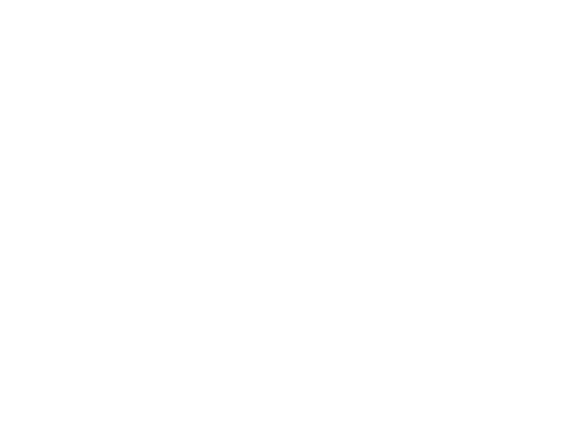

In [4]:
# check_imgs = dict()
# def draw(img_n, img, test_set):
#     img_c = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
#     t = test_set[test_set['img']==img_n]
    
#     def add_rect(row, img_c):
#         start = (int(row['x']), int(row['y']))
#         end = (int(row['x']+row['size']), int(row['y']+row['size']))
#         color = (0, 0, 255)
#         img_c = cv2.rectangle(img_c, start, end, color, 2)
#         img_c = cv2.putText(img_c, row['type'], (int(row['x']), int(row['y']) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
#     t.apply(add_rect, img_c=img_c,axis=1)
#     return img_c

# df1 = df[df['type']=='none']
# for it in df1['img'].unique().tolist():
#     check_imgs[it] = draw(it, imgs[it], df1)

# def slideshow(img_list, title_list=None):
#     import matplotlib.pyplot as plt
#     import numpy as np
#     from matplotlib.widgets import Slider, Button, RadioButtons
#     %matplotlib notebook
#     fig = plt.figure()
#     viewer = fig.add_subplot(111)

#     fig.show()
#     axcolor = 'lightgoldenrodqyellow'
#     axmax  = fig.add_axes([0.15, 0.1, 0.7, 0.02])
#     smax = Slider(axmax, 'idx', 0, len(img_list)-1,valinit=0, valstep=1)

#     def arrow_key_image_control(event):
#         if event.key=='a':
#             update((smax.val-1)%len(img_list))
#         if event.key=='d':
#             update((smax.val+1)%len(img_list))

#     def update(val):
#         smax.val = val
#         viewer.clear() # Clears the previous image
#         viewer.imshow(img_list[int(smax.val)], cmap='gray') # Loads the new image
#         s = str(smax.val+1)+'/'+str(len(img_list))
#         if len(title_list) > smax.val:
#             s+= ' - '+title_list[smax.val]
#         viewer.set_title(s)
#         plt.pause(0.01) # Delay in seconds
#         fig.canvas.draw() # Draws the image to the screen

#     smax.on_changed(update)
#     cid = fig.canvas.mpl_connect('key_press_event', arrow_key_image_control)
#     viewer.imshow(img_list[0], cmap='gray')

# slideshow(list(check_imgs.values()), list(check_imgs.keys()))

<IPython.core.display.Javascript object>


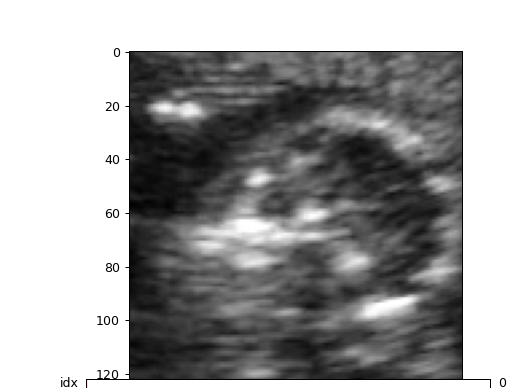

In [5]:
slideshow(df['subsection'].tolist(), df['type'].tolist())

In [6]:
df

,type,x,y,img,from_file,size,subsection
0,head,366,139,19150_2021-01-25_21.00_20523817.png,Batch1.csv,124,"[[40, 48, 58, 58, 58, 55, 53, 61, 75, 86, 90, ..."
1,arm,264,147,19150_2021-01-25_21.00_20523817.png,Batch1.csv,99,"[[48, 36, 28, 25, 18, 12, 12, 15, 15, 15, 14, ..."
2,head,352,134,19158_2021-01-10_19.16_191051467.png,Batch1.csv,151,"[[155, 146, 141, 148, 154, 154, 152, 147, 144,..."
3,spine,294,226,19158_2021-01-10_19.16_191051467.png,Batch1.csv,90,"[[53, 51, 47, 51, 55, 60, 66, 72, 73, 71, 74, ..."
4,head,397,126,19162_2021-01-08_13.46_134330502.png,Batch1.csv,123,"[[115, 119, 123, 132, 131, 136, 141, 141, 137,..."
...,...,...,...,...,...,...,...
4115,none,395,319,19891_2021-02-14_20.37_203144986.png,Auto-generated,157,"[[64, 61, 59, 59, 60, 57, 56, 55, 55, 53, 49, ..."
4116,none,500,377,19738_2021-01-24_11.39_11340960.png,Auto-generated,165,"[[95, 113, 125, 124, 116, 109, 107, 109, 114, ..."
4117,none,532,323,19715_2021-01-23_14.25_142246433.png,Auto-generated,193,"[[19, 22, 26, 29, 31, 32, 31, 27, 22, 21, 23, ..."
4118,none,383,311,19877_2021-02-12_22.03_21553231.png,Auto-generated,139,"[[135, 141, 148, 157, 165, 171, 177, 183, 188,..."


In [7]:
import matplotlib
from pathlib import Path


def save_subsection(row):
    p = path+'/Features/'+row['type']
    Path(p).mkdir(parents=True, exist_ok=True)
    cv2.imwrite(p+'/'+str(row.name)+'~'+row['img'], row['subsection'])

df.apply(save_subsection, axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
4115    None
4116    None
4117    None
4118    None
4119    None
Length: 4120, dtype: object